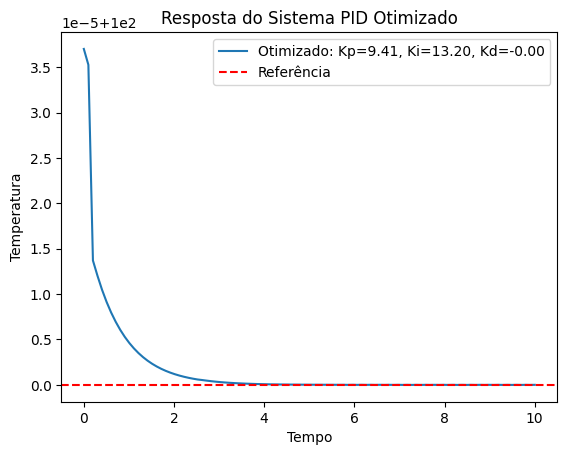

Parâmetros PID otimizados com CG:
Kp = 9.4084, Ki = 13.2000, Kd = -0.0000
Erro quadrático médio (MSE): 0.000000


In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Função que representa o sistema de controle (sistema de primeira ordem)
def system(T, t, u):
    return -T + u

# Função que define o controlador PID
def pid_controller(Kp, Ki, Kd, e, e_integral, e_derivative):
    return Kp * e + Ki * e_integral + Kd * e_derivative

# Função para simular o sistema controlado
def simulate_pid(Kp, Ki, Kd, T_ref, T0, t):
    T = T0
    e_integral = 0
    e_previous = 0
    response = []

    for i in range(len(t)):
        e = T_ref - T
        e_integral += e * (t[1] - t[0])
        e_derivative = (e - e_previous) / (t[1] - t[0])
        u = pid_controller(Kp, Ki, Kd, e, e_integral, e_derivative)
        T = odeint(system, T, [t[i], t[i] + (t[1] - t[0])], args=(u,))[-1]
        response.append(T)
        e_previous = e

    return np.array(response)

# Função-objetivo: calcular o erro quadrático médio (MSE)
def funcaoobjetivo(x):
    T_ref = 100.0
    T0 = 25.0
    t = np.linspace(0, 10, 100)

    Kp, Ki, Kd = x
    response = simulate_pid(Kp, Ki, Kd, T_ref, T0, t)
    mse = np.mean((T_ref - response) ** 2)
    return mse

# Chute inicial
ponto_inicial = [1.0, 0.1, 0.01]

# Escolher o método ('CG' ou 'BFGS')
metodo_otimizacao = 'CG'  # ou 'CG'

# Chamada do otimizador
resultado = minimize(funcaoobjetivo, ponto_inicial, method=metodo_otimizacao)

# Extração dos parâmetros otimizados
Kp_opt, Ki_opt, Kd_opt = resultado.x

# Simulação com os parâmetros otimizados
T_ref = 100.0
t = np.linspace(0, 10, 100)
response_opt = simulate_pid(Kp_opt, Ki_opt, Kd_opt, T_ref, 25.0, t)

# Plotagem do resultado
plt.plot(t, response_opt, label=f'Otimizado: Kp={Kp_opt:.2f}, Ki={Ki_opt:.2f}, Kd={Kd_opt:.2f}')
plt.axhline(y=T_ref, color='r', linestyle='--', label='Referência')
plt.xlabel('Tempo')
plt.ylabel('Temperatura')
plt.legend()
plt.title(f'Resposta do Sistema PID Otimizado')
plt.show()

# Exibir parâmetros otimizados
print(f"Parâmetros PID otimizados com {metodo_otimizacao}:")
print(f"Kp = {Kp_opt:.4f}, Ki = {Ki_opt:.4f}, Kd = {Kd_opt:.4f}")
print(f"Erro quadrático médio (MSE): {resultado.fun:.6f}")

In [ ]:
import time
from scipy.optimize import minimize

# Chute inicial
ponto_inicial = [1.0, 0.1, 0.01]
metodos = ['CG', 'BFGS']
resultados = {}

for metodo in metodos:
    print(f"\n==> Otimizando com método: {metodo}")

    inicio = time.time()
    res = minimize(funcaoobjetivo, ponto_inicial, method=metodo)
    fim = time.time()

    resultados[metodo] = {
        "Kp": res.x[0],
        "Ki": res.x[1],
        "Kd": res.x[2],
        "mse": res.fun,
        "iteracoes": res.nit,
        "tempo": fim - inicio,
        "convergiu": res.success,
        "mensagem": res.message
    }

    print(f"  Kp: {res.x[0]:.4f}, Ki: {res.x[1]:.4f}, Kd: {res.x[2]:.4f}")
    print(f"  MSE: {res.fun:.6f}, Iterações: {res.nit}, Tempo: {fim - inicio:.4f}s")
    print(f"  Convergiu? {res.success}, Mensagem: {res.message}")
